<a href="https://colab.research.google.com/github/kwamePhilip/Conductivity_Predictor_from_IOT-_sensors/blob/main/Water_Conductivity_Predictor_from_IOT_Sensing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
pwd


'/content'

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/IOTMeterData_new.csv')

This data was obtained from IOT meter sensors for recycled water

In [21]:
df.head(2)

,Temperature (C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (micro_mhos/cm)
0,30.6,7.5,47.0,48.9,5421,4.0,0.13,208
1,30.6,7.2,45.8,47.0,5632,4.0,0.12,210


## Lets do some EDA

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature (C)                   1000 non-null   float64
 1   pH                                1000 non-null   float64
 2   Turbidity (NTU)                   1000 non-null   float64
 3   BOD (mg/l)                        1000 non-null   float64
 4   Fecal Coliform (MPN/100ml)        1000 non-null   int64  
 5   Disolved Oxygen (mg/l)            1000 non-null   float64
 6   NITRATENAN N+ NITRITENANN (mg/l)  1000 non-null   float64
 7   Conductivity (micro_mhos/cm)      1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


Looks like there is no missing values

In [23]:
df.describe()

,Temperature (C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (micro_mhos/cm)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,32.131600,7.450400,45.095000,44.991100,5287.422000,3.827500,0.156550,298.871000
std,2.067355,0.302045,1.957792,4.466587,187.107785,0.196857,0.052826,49.806536
min,28.000000,6.800000,42.100000,30.900000,4699.000000,3.200000,0.100000,204.000000
25%,30.800000,7.200000,43.500000,44.400000,5222.000000,3.800000,0.100000,255.000000
50%,31.500000,7.400000,44.500000,46.500000,5317.000000,3.900000,0.140000,290.500000
75%,32.600000,7.600000,46.600000,48.200000,5428.000000,4.000000,0.190000,335.000000
max,38.800000,8.200000,50.900000,50.700000,5643.000000,4.000000,0.300000,405.000000


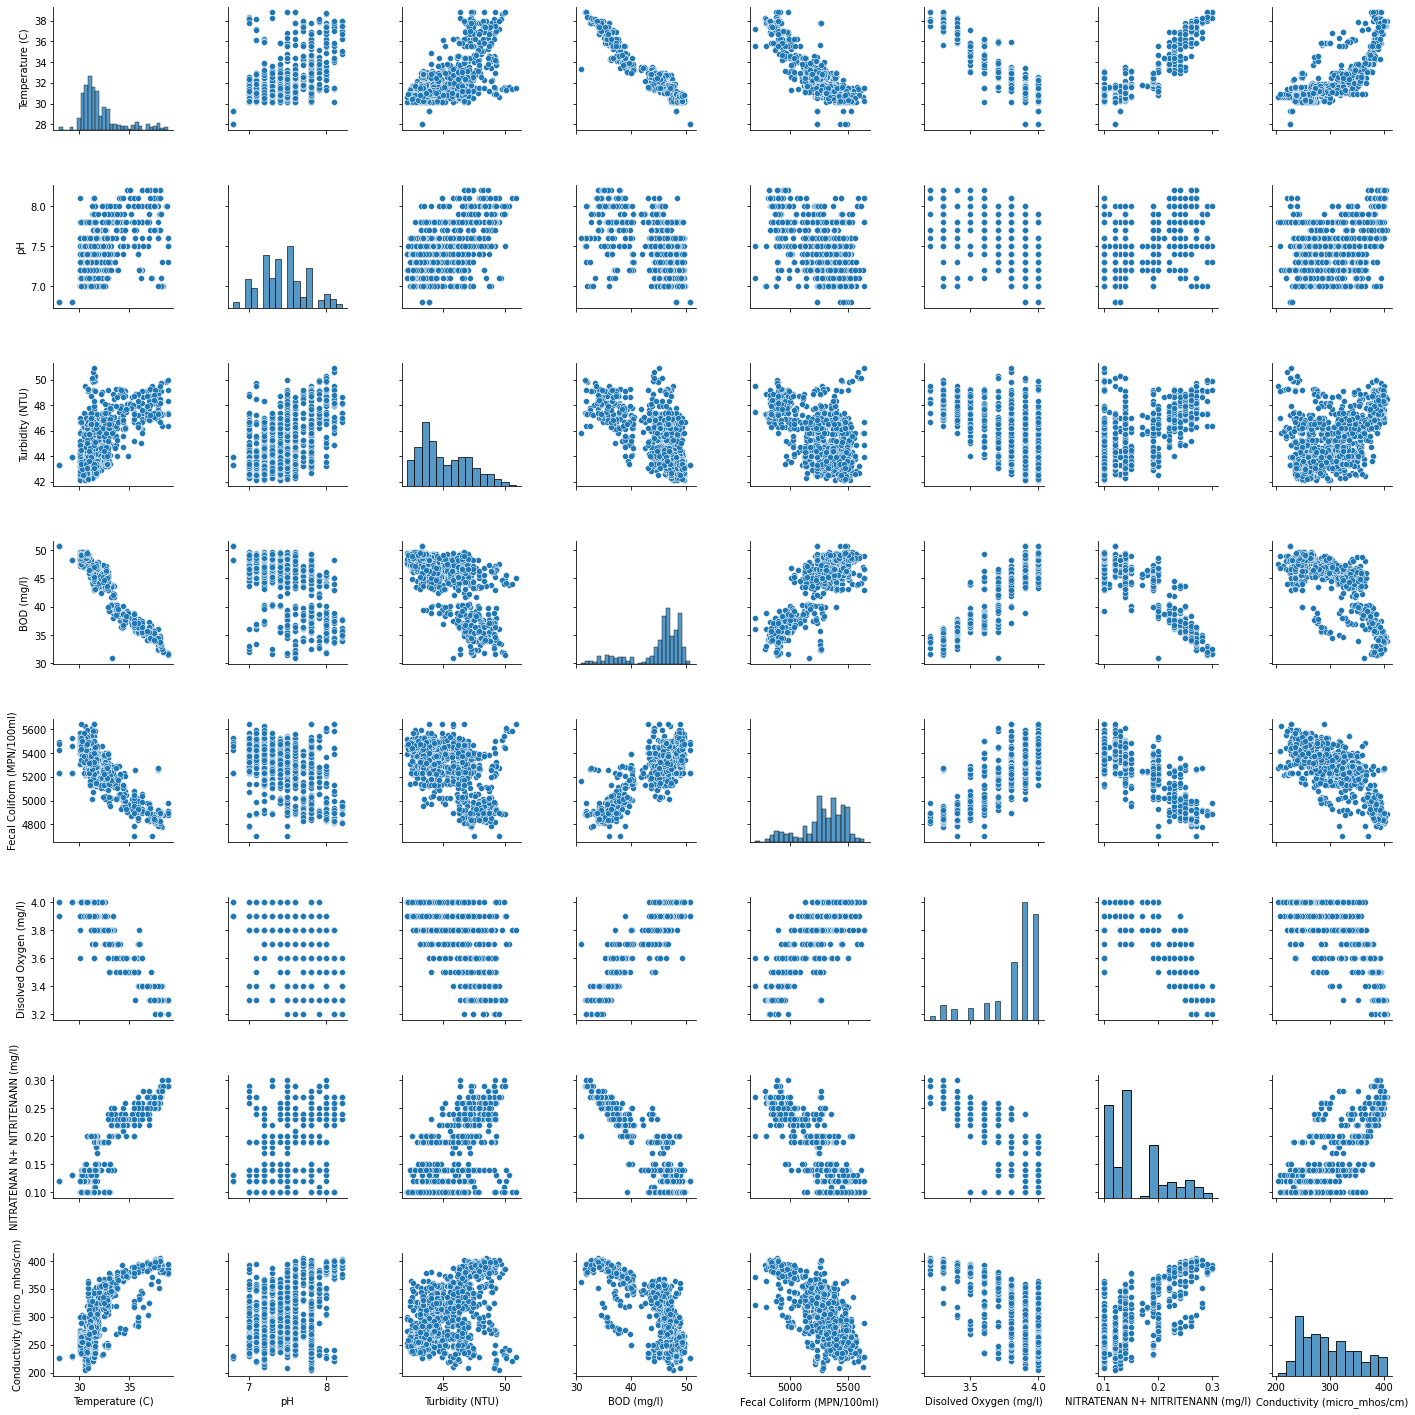

In [24]:
sns.pairplot(df)
plt.show()

Lets see the the distribution of the Conductivity

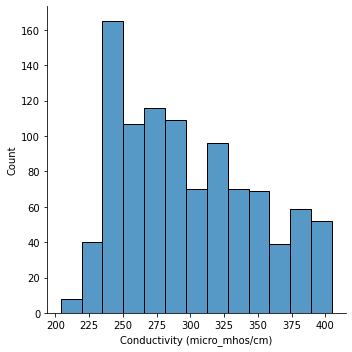

0.41556993209818255

In [25]:
sns.displot(df['Conductivity (micro_mhos/cm)'])
plt.show()
df['Conductivity (micro_mhos/cm)'].skew()

This is right-skewed

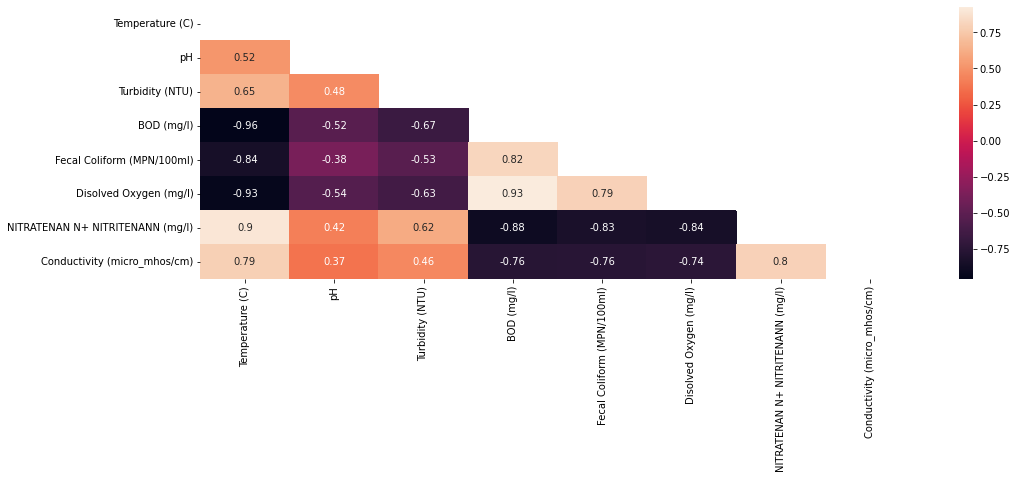

In [26]:
# Lets use heatmap to visualize the correlations
hide = np.zeros_like(df.corr())
top_triangle=np.triu_indices_from(hide)
hide[top_triangle] = True

plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot=True, mask=hide)

Lots of good correlations here

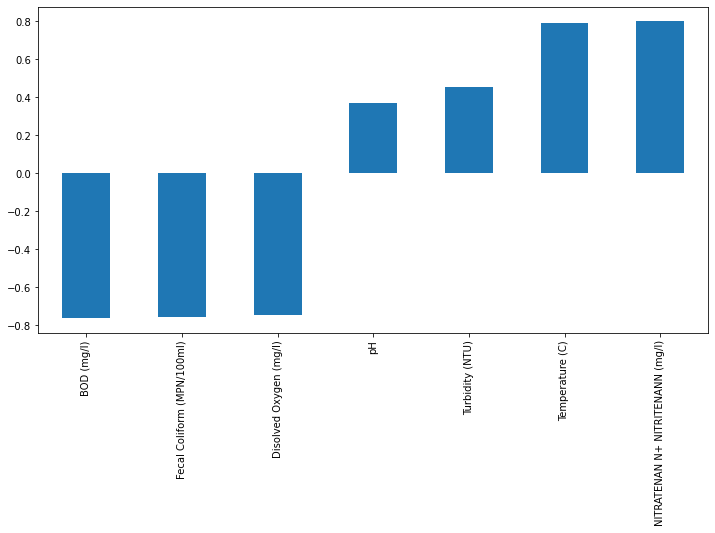

In [27]:
# Lets see it clearly
plt.figure(figsize=(12,6))
df.corr()['Conductivity (micro_mhos/cm)'].sort_values().drop('Conductivity (micro_mhos/cm)').plot(kind='bar')

## Let's try Multilinear Regression

In [28]:
X= df.drop('Conductivity (micro_mhos/cm)', axis=1)
y= df['Conductivity (micro_mhos/cm)']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Intercept', lm.intercept_)
pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['coef'])

Intercept 265.06150598335705


,coef
Temperature (C),9.334731
pH,2.670001
Turbidity (NTU),-2.600469
BOD (mg/l),2.189597
Fecal Coliform (MPN/100ml),-0.049881
Disolved Oxygen (mg/l),-18.971015
NITRATENAN N+ NITRITENANN (mg/l),438.131040


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = lm .predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

28.814927119024603

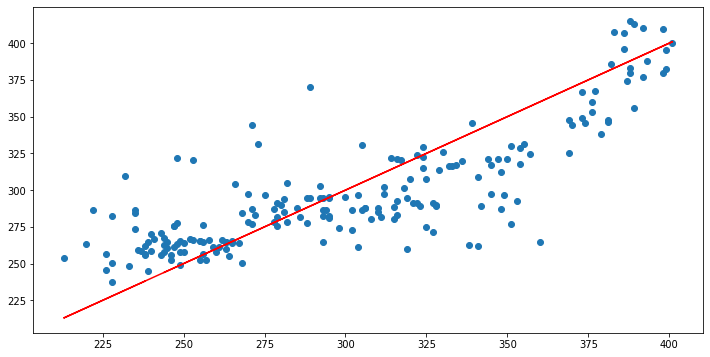

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

## Lets Start our ANN ML!

In [33]:
X= df.drop('Conductivity (micro_mhos/cm)', axis=1).values
y= df['Conductivity (micro_mhos/cm)'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
X_train.shape

(800, 7)

In [36]:
# Lets scale opur data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = Sequential()
model.add(Dense(7, activation='relu'))

model.add(Dense(7, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))



model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

from tensorflow.keras.callbacks import  EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience = 10)


model.fit(x=X_train,  y=y_train, validation_data= (X_test, y_test), epochs=800, callbacks= [early_stop])

Epoch 1/800
25/25 [==============================] - 1s 11ms/step - loss: 91500.5469 - val_loss: 92905.0469
Epoch 2/800
25/25 [==============================] - 0s 3ms/step - loss: 91432.9219 - val_loss: 92810.1406
Epoch 3/800
25/25 [==============================] - 0s 3ms/step - loss: 91315.1875 - val_loss: 92654.0938
Epoch 4/800
25/25 [==============================] - 0s 3ms/step - loss: 91088.0078 - val_loss: 92319.4297
Epoch 5/800
25/25 [==============================] - 0s 4ms/step - loss: 90588.7500 - val_loss: 91579.6328
Epoch 6/800
25/25 [==============================] - 0s 3ms/step - loss: 89506.6719 - val_loss: 90015.3984
Epoch 7/800
25/25 [==============================] - 0s 4ms/step - loss: 87270.5703 - val_loss: 86839.4922
Epoch 8/800
25/25 [==============================] - 0s 4ms/step - loss: 82850.4453 - val_loss: 80736.3516
Epoch 9/800
25/25 [==============================] - 0s 3ms/step - loss: 74716.8359 - val_loss: 69920.7969
Epoch 10/800
25/25 [================

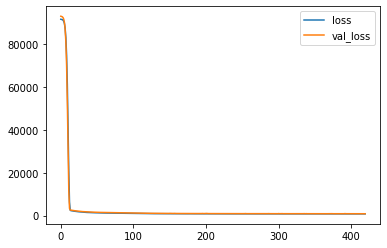

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:

preds = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

29.247881976400226

In [40]:
explained_variance_score(y_test, preds)

0.6586541159907222

Text(0, 0.5, 'Predicted Conductivity')

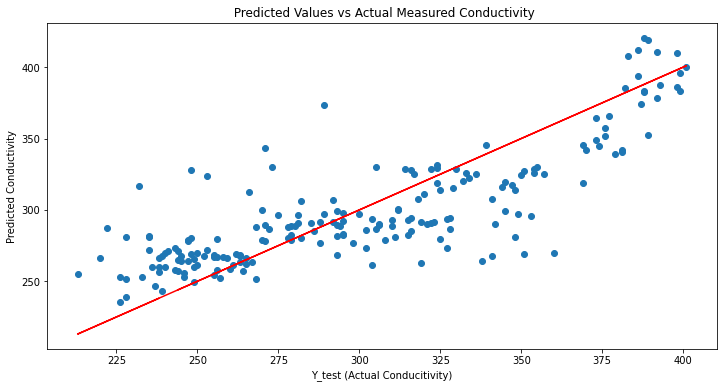

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, 'r')
plt.title(" Predicted Values vs Actual Measured Conductivity")
plt.xlabel("Y_test (Actual Conducitivity)")
plt.ylabel("Predicted Conductivity")